In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
import string
from nltk.stem.snowball import SnowballStemmer

In [2]:
# Reading the data file into a DATAFRAME and checking the shape 
data=pd.read_csv('AmazonMobileDataUncleaned.csv')
print(data.shape)

(71922, 2)


In [3]:
def datapreprocess(sen):
    
    sen = re.sub(r"didn't", "did not", sen)
    sen = re.sub(r"don't", "do not", sen)
    sen = re.sub(r"won't", "will not", sen)
    sen = re.sub(r"can't", "can not", sen)
    sen = re.sub(r"wasn't", "do not", sen)
    sen = re.sub(r"\'ve", " have", sen)
    sen = re.sub(r"\'m", " am", sen)
    sen = re.sub(r"\'ll", " will", sen)
    sen = re.sub(r"\'re", " are", sen)
    sen = re.sub(r"\'s", " is", sen)
    sen = re.sub(r"\'d", " would", sen)
    sen = re.sub(r"\'t", " not", sen)
    sen = re.sub(r"\'m", " am", sen)
    sen = re.sub(r"n\'t", " not", sen)
    
    p = set(string.punctuation) # p take all the punctuations, punctuations displayed below
    sen=sen.lower() # convert text to lower case
    words=sen.split() # split the text into words
    ctext=[]
    for i in range(10): #adding numbers from 0 - 9 to p 
        p.add(str(i))
    for i in words:
        t=''.join([x for x in i.encode("ascii","ignore").decode("ascii") if x not in p]) # ignoring non ascii charecters and numbers
        ctext.append(t)
    return " ".join([i for i in ctext]) # joining the cleaned words to text
    
    

stop=set(stopwords.words('english'))
print(stop)
stop.remove('no')
stop.remove('not')
stop.remove('nor')

preprocessed_essays = []
for sentance in data['uncleanedreview'].values:
    try:
        ctxt=datapreprocess(str(sentance))
        if len(ctxt)==0: raise()
        ctxt = ' '.join(e for e in ctxt.split() if e not in stop)
        preprocessed_essays.append(ctxt.lower().strip())
    except:
        preprocessed_essays.append("NAN")  
data['cleanedtext'] = preprocessed_essays
data.drop(data[data["cleanedtext"]=="NAN"].index,axis = 0,inplace = True) # deleting rows that have no text 
data=data.reset_index(drop='true') # after deleting rows index should be reset
data['decision']= data['decision'].replace('positive',1)
data['decision']= data['decision'].replace('negative',0)


s = SnowballStemmer("english")
p=[]
for i in data['cleanedtext'].values:
    k=[]
    for word in i.split():
        k.append(s.stem(word))
    l=' '.join(k)
    p.append(l)

data['j']=p

data.to_csv (r'AmazonMobileDataCleaned.csv')

{"i'm", "shan't", 'through', 'was', 'each', "i've", 'more', "hadn't", 're', 'shan', 'in', 'up', "they'll", "they're", "you're", 'be', 'don', 'over', "i'll", 'so', 'at', 'further', 'we', 'weren', 'the', 'whom', 'why', 'him', 'am', 'd', 'with', 'again', "she'd", "aren't", 'theirs', 'they', 'very', "you'll", 'down', 'then', "you've", 'herself', 'ourselves', 'mightn', 'no', "mustn't", 'ours', 'during', 'it', 'did', 'which', 'isn', "we've", 'few', 'that', 'has', 'hasn', 'does', 'when', "it'd", 'myself', "he'd", 'because', 'i', 'were', 'before', 'ain', "i'd", 'under', 't', 'yourselves', 'against', 'after', 'but', 'our', 'her', 'such', 'other', 'a', 'about', 'where', 'most', 'll', 'been', 'having', 'didn', "isn't", 'until', "he'll", "should've", 'for', 'this', "doesn't", 'm', 'how', 'an', 'yours', 'itself', "wasn't", 'now', 'what', 'not', 'o', "won't", "it's", 'hers', 'than', 'off', 'me', 'is', 'won', 'y', 'wouldn', 'being', 'these', "you'd", 'once', 'there', "haven't", 'your', 'out', 'himsel

/var/folders/0p/wyfyjj_94yv7kd73x6j_gc9c0000gn/T/ipykernel_12436/3623132011.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['decision']= data['decision'].replace('negative',0)


In [4]:
data=pd.read_csv('AmazonMobileDataCleaned.csv',nrows=5000)
print(data.shape)
label = data['decision'].values
feedback = data.drop(['decision'], axis=1)
print(label.shape)
print(feedback.shape)
print("------------------------------")

from sklearn.model_selection import train_test_split
inputtrain, inputtest, outputtrain, outputtest = train_test_split(feedback, label, test_size=0.20, stratify=label)
print(inputtrain.shape)
print(inputtest.shape)
print(outputtrain.shape)
print(outputtest.shape)

(5000, 5)
(5000,)
(5000, 4)
------------------------------
(4000, 4)
(1000, 4)
(4000,)
(1000,)


In [5]:
# convert into Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
featur = []
vec = CountVectorizer(min_df=10,ngram_range=(1,4))
vec.fit(inputtrain['j'].values) # fit has to happen only on train data


train_cleanedtext = vec.transform(inputtrain['j'].values)
test_cleanedtext= vec.transform(inputtest['j'].values)

print("After vectorizations")
print(train_cleanedtext.shape)
print(test_cleanedtext.shape)
print(outputtrain.shape)
print(outputtest.shape)
print("...............................")

featur+=list(vec.get_feature_names_out())

After vectorizations
(4000, 2812)
(1000, 2812)
(4000,)
(1000,)
...............................


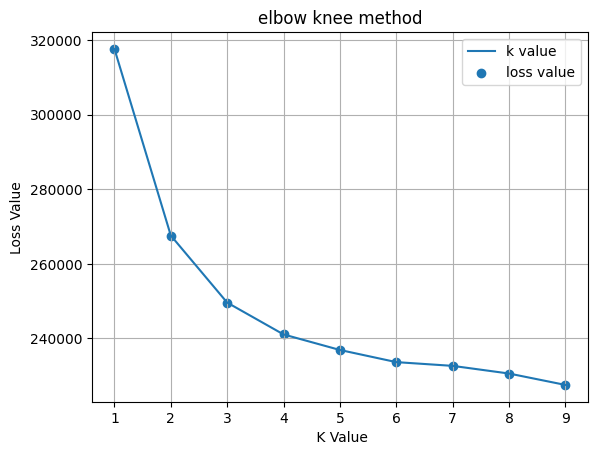

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
k=[]
iner=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i).fit(train_cleanedtext)
    iner.append(kmeans.inertia_)
    k.append(i)
plt.plot(k,iner, label='k value')

plt.scatter(k,iner, label='loss value')


plt.legend()
plt.xlabel(" K Value")
plt.ylabel("Loss Value")
plt.title("elbow knee method")
plt.grid()
plt.show()

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


noofclusters = [2, 3,4,5,6,7,8]

for clusters in noofclusters:
    
    clust = KMeans(n_clusters=clusters)
    cluster_labels = clust.fit_predict(train_cleanedtext)

    
    silhouette_avg = silhouette_score(train_cleanedtext, cluster_labels)
    print("noofclusters =", clusters,
          "The average silhouette_score is :", silhouette_avg)


noofclusters = 2 The average silhouette_score is : 0.6142631916678482
noofclusters = 3 The average silhouette_score is : 0.4587289480000591
noofclusters = 4 The average silhouette_score is : 0.3005503052668893
noofclusters = 5 The average silhouette_score is : 0.3699658753508893
noofclusters = 6 The average silhouette_score is : 0.3484768700866896
noofclusters = 7 The average silhouette_score is : 0.22997889088519463
noofclusters = 8 The average silhouette_score is : 0.3015899854182705


In [11]:
kmeans = KMeans(n_clusters=2).fit(train_cleanedtext)
x=kmeans.labels_
print(x)

[1 1 1 ... 1 1 1]


In [12]:
print(kmeans.predict(test_cleanedtext))

[0 0 7 2 0 0 2 7 0 2 0 0 0 0 0 0 0 0 4 0 2 0 0 6 0 0 6 0 0 2 2 0 0 0 0 0 4
 2 0 0 0 0 6 0 0 0 0 0 2 0 0 0 2 2 2 0 6 0 2 2 6 0 8 0 0 0 0 0 8 0 0 0 0 0
 0 0 0 2 2 2 0 0 2 0 7 3 0 0 7 0 0 0 3 2 0 0 2 0 0 0 0 0 6 0 0 0 2 0 0 0 0
 2 3 2 0 0 0 0 0 2 0 0 6 0 0 0 0 6 0 0 2 3 0 0 0 0 0 0 2 2 0 8 0 0 3 0 0 0
 2 0 0 2 6 2 6 0 0 0 2 0 0 0 2 0 2 0 2 2 0 0 0 7 0 0 6 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 0 4 0 0 7 0 2 0 0 0 0 2 0 0 2 0 2 0 0 7 0 0 0 0 0 0 0 6 3
 0 6 0 2 0 0 0 6 0 0 0 0 0 0 0 2 0 2 2 0 0 2 0 0 2 0 0 2 0 0 0 2 2 7 0 0 2
 0 6 2 0 0 4 0 7 0 8 2 2 0 0 6 2 0 2 0 0 0 2 7 2 0 0 2 6 8 6 2 2 0 0 0 0 2
 6 0 2 0 2 2 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0 6 2 8 0 0 0 2 2 0 0 7 2 0 2 0 0
 0 7 0 0 7 0 2 0 0 0 2 2 0 2 2 8 2 0 2 0 0 0 0 0 0 7 0 0 0 0 0 0 6 2 6 0 0
 0 0 0 2 0 2 0 0 0 8 1 0 2 0 0 0 2 6 0 0 0 0 0 0 7 0 0 0 0 0 0 4 2 6 0 0 2
 3 2 2 0 0 7 7 0 6 0 0 2 0 2 0 0 6 0 7 2 0 0 0 0 0 7 0 2 2 0 0 0 0 0 0 2 0
 0 2 6 2 2 2 0 4 2 0 2 0 0 7 3 8 2 0 6 0 7 0 0 0 0 3 0 2 8 7 0 0 2 0 0 0 2
 2 0 2 7 2 2 0 2 0 0 0 7 